# **Audio classification using Machine learning**
EDA = Exploratory data analysis.

Not sure but dataset could be downloaded from this link https://goo.gl/8hY5ER

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import IPython.display as ipd #this file will help in displaying sound as audio signal

In [4]:
import librosa
import librosa.display

In [5]:
filename = '/kaggle/input/urbansound8k/fold1/103074-7-1-5.wav'

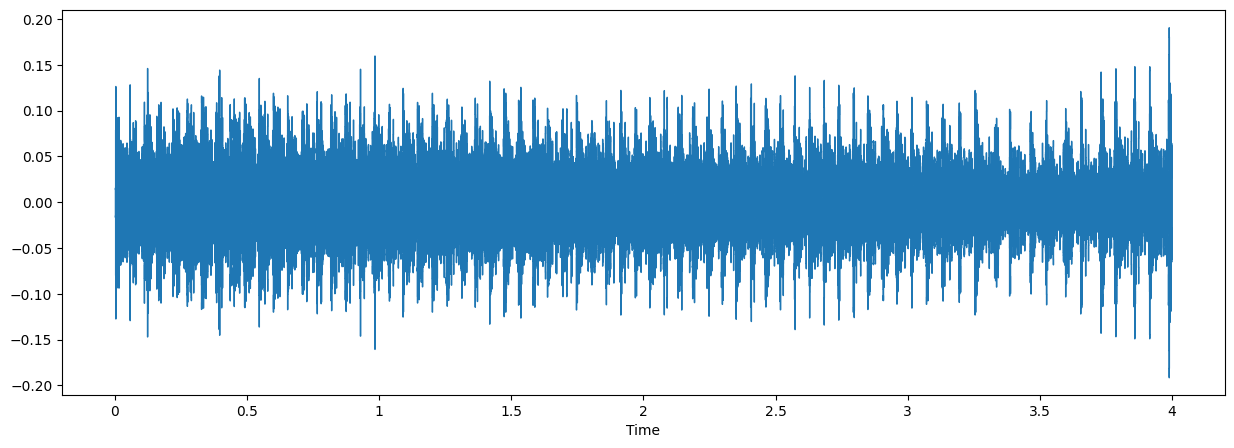

In [6]:
#checking for a sound

plt.figure(figsize = (15,5))
data,sample_rate=librosa.load(filename)
librosa.display.waveshow(data,sr=sample_rate)
ipd.Audio(filename)

In [7]:
sample_rate     #it is calculating how much sound is sampled per sec.  it give answer in khz

22050

In [8]:
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio = wav.read(filename)
wave_sample_rate  

48000

So, here we can see originally the audio has sample rate of 48000 , but librosa converst any audio to the sample rate of 22050

In [9]:
wave_audio

array([[ 31878656, -16615168],
       [ 44596992,   6384896],
       [ 48604416,  16203264],
       ...,
       [116372992,  89551360],
       [126842368, 106552320],
       [115606016, 101346304]], dtype=int32)

these values are unique value of each and every signal , the amplitude's different value and all the values combinely forming the wave

In [10]:
data

array([ 0.00415271,  0.01601547,  0.0092801 , ..., -0.00297348,
        0.02721437,  0.05509059], dtype=float32)

see, here librosa normalizing the same values between -1 and +1

In [11]:
import pandas as pd

metadata= pd.read_csv('/kaggle/input/urbansound8k/UrbanSound8K.csv')
metadata.head(15)

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
5,100263-2-0-143.wav,100263,71.500000,75.500000,1,5,2,children_playing
6,100263-2-0-161.wav,100263,80.500000,84.500000,1,5,2,children_playing
7,100263-2-0-3.wav,100263,1.500000,5.500000,1,5,2,children_playing
8,100263-2-0-36.wav,100263,18.000000,22.000000,1,5,2,children_playing
9,100648-1-0-0.wav,100648,4.823402,5.471927,2,10,1,car_horn


In [12]:
#checking dataset
metadata['class'].value_counts()

class
dog_bark            1000
children_playing    1000
air_conditioner     1000
street_music        1000
jackhammer          1000
engine_idling       1000
drilling            1000
siren                929
car_horn             429
gun_shot             374
Name: count, dtype: int64

most of the class have ample amount of data , so dataset is perfect
librosa converts any channel audio into mono channel

# **Audio classification and Preprocessing**

In [13]:
#read a sample audio using librosa
import librosa
audio_file_path='/kaggle/input/urbansound8k/fold10/100648-1-1-0.wav'
librosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path)

In [14]:
print(librosa_audio_data)

[-2.7939677e-09 -3.2596290e-09 -4.6566129e-10 ... -2.4778431e-02
 -1.5212605e-02 -3.8560163e-03]


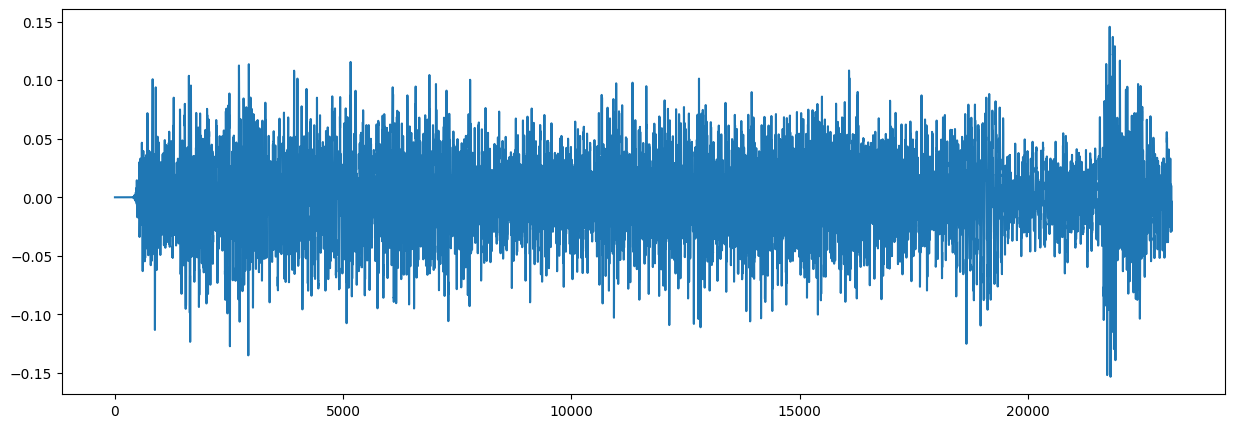

In [15]:
#plotting the librosa audio data
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))   # Original audio with 1 channel 
plt.plot(librosa_audio_data)

Here Librosa has converted the signal to mono, meaning the channel will always be 1 i.e. monoaudio

In [16]:
from scipy.io import wavfile as wav  #Performing the same process wid scipy
wave_sample_rate, wave_audio = wav.read(audio_file_path)

In [17]:
wave_audio

array([[   0,    0],
       [   0,    0],
       [   0,    0],
       ...,
       [-480, -480],
       [-318, -318],
       [-133, -133]], dtype=int16)

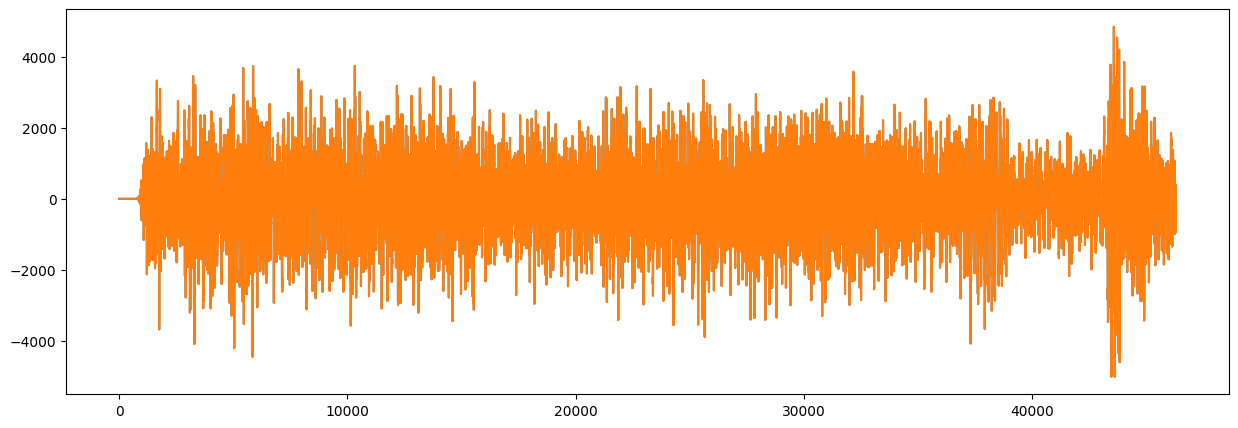

In [18]:
import matplotlib.pyplot as plt


plt.figure(figsize=(15, 5)) # Original audio with 2 channels 
plt.plot(wave_audio)

In [19]:
# Importing necessary libraries againd

# Data preprocessing
import pandas as pd
import numpy as np
import os, librosa
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Visualization
import IPython.display as ipd
import matplotlib.pyplot as plt
import seaborn as sns

# Model 
from tensorflow import keras
from keras.utils import to_categorical
from keras import layers, Sequential
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Metrics
from sklearn.metrics import confusion_matrix

# Suppressing warnings
from warnings import filterwarnings
filterwarnings('ignore')

2024-04-27 00:59:13.723575: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-27 00:59:13.723700: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-27 00:59:13.873513: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# features extraction
using Mel-Frequency Cepstral Coefficients(MFCC)

In [20]:
mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=40)
print(mfccs.shape)

(40, 46)


In [21]:
mfccs

array([[-378.57523  , -235.33522  , -196.75966  , ..., -161.18037  ,
        -179.25592  , -229.67804  ],
       [  98.30224  ,  104.11733  ,  106.76799  , ...,  106.518005 ,
         109.31789  ,  104.830826 ],
       [ -33.69744  ,  -27.447355 ,  -22.851711 , ...,  -18.910263 ,
         -12.274792 ,   -4.1100616],
       ...,
       [  -6.460531 ,   -3.993589 ,   -2.6537743, ...,   -3.3432155,
           5.118074 ,    1.7960309],
       [ -15.892544 ,  -15.130504 ,  -10.850932 , ...,  -15.97656  ,
         -13.390069 ,  -12.785208 ],
       [  12.11984  ,   12.837378 ,   12.33375  , ...,   -2.931756 ,
          -4.876607 ,    0.5197776]], dtype=float32)

these are patterns extracted using time and frequency characterstics
this will uniquely identify the audio signal and class to which it belongs   
*this is a exaple for one file

In [22]:
#for all the files we will be performing it in following manner
import pandas as pd
import os
import librosa

audio_dataset_path = '/kaggle/input/urbansound8k'
metadata =  pd.read_csv('/kaggle/input/urbansound8k/UrbanSound8K.csv')
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [23]:
# Computing Mel-frequency cepstral coefficients
def mfccExtract(file):
    # Loading audio file
    waveform, sampleRate = librosa.load(file_name)
   
    features = librosa.feature.mfcc(y = waveform, sr = sampleRate, n_mfcc = 50)
    return np.mean(features, axis = 1)

In [24]:
# Now we iterate through every audio file and extract features 
# using Mel-Frequency Cepstral Coefficients
#using iterrows we will iterate through all the rows of the dataset
# Storing mfcc features along with classes in dataframe
extractAll = []

import numpy as np
from tqdm import tqdm
# Iterating through each row
for index_num, row in tqdm(metadata.iterrows()):
    # Constructing file path
    file_name = os.path.join(audio_dataset_path, 'fold' + str(row['fold']), row['slice_file_name'])
    
    # Extracting features and appending them
    features = mfccExtract(file_name)
    extractAll.append([features, row['class']])

8732it [07:56, 18.32it/s]


In [25]:
featuresDf = pd.DataFrame(extractAll, columns = ['Features', 'Class'])
featuresDf.head()

,Features,Class
0,"[-211.93698, 62.58122, -122.813156, -60.745296...",dog_bark
1,"[-417.00525, 99.336624, -42.995586, 51.073326,...",children_playing
2,"[-452.39316, 112.36253, -37.578075, 43.195866,...",children_playing
3,"[-406.47922, 91.19661, -25.043556, 42.784523, ...",children_playing
4,"[-439.63873, 103.86224, -42.658787, 50.690285,...",children_playing


In [26]:
### Split the dataset into independent and dependent dataset
X=np.array(featuresDf['Features'].tolist())
Y=np.array(featuresDf['Class'].tolist()) 

In [27]:
X.shape

(8732, 50)

In [28]:
Y

array(['dog_bark', 'children_playing', 'children_playing', ...,
       'car_horn', 'car_horn', 'car_horn'], dtype='<U16')

In [29]:
### Label Encoding
###y=np.array(pd.get_dummies(y))
### Label Encoder
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
Y=to_categorical(labelencoder.fit_transform(Y))

In [30]:
Y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [31]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [32]:
X_train

array([[-1.2448469e+02,  1.0316985e+02, -1.3316547e+01, ...,
         1.2973652e+00, -4.2031169e+00, -3.6576962e+00],
       [-5.1392198e+00,  7.9047821e+01,  4.1624899e+00, ...,
         1.1267774e+00, -2.2092886e+00, -1.1642029e+00],
       [-4.0393959e+01, -1.3109296e+01, -7.2098761e+00, ...,
         1.5315658e+00, -1.7441380e+00,  3.9913750e-01],
       ...,
       [-4.2665570e+02,  9.1551338e+01,  4.1917028e+00, ...,
         1.0586665e+00,  4.0047975e+00,  3.5553720e+00],
       [-1.3725198e+02,  1.2426854e+02, -2.1599773e+01, ...,
         4.0576777e-01, -1.2678170e+00,  6.3812965e-01],
       [-4.1838937e+02,  2.0686234e+02,  7.2346196e+00, ...,
        -2.0101388e+00, -3.1652927e+00, -3.7493563e-01]], dtype=float32)

In [33]:
Y_train

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [34]:
X_train.shape

(6985, 50)

In [35]:
X_test.shape

(1747, 50)

In [36]:
Y_train.shape

(6985, 10)

there are 10 classes , i.e.  different folders in dataset that's why y got 10

In [37]:
Y_test.shape

(1747, 10)

In [38]:
### No of classes
num_labels=Y.shape[1]

# Model creation

In [39]:
import tensorflow as tf

In [40]:
model = Sequential([
    layers.Dense(1024, activation = 'relu', input_shape = (50,)), #above we have kept the value of features as 50
    layers.BatchNormalization(), #first layer
    
    layers.Dense(512, activation = 'relu'),
    layers.BatchNormalization(),
    
    layers.Dense(256, activation = 'relu'),
    layers.BatchNormalization(),
    
    layers.Dense(128, activation = 'relu'),
    layers.BatchNormalization(),
    
    layers.Dense(64, activation = 'relu'),
    layers.BatchNormalization(),
    
    layers.Dense(32, activation = 'relu'),
    layers.BatchNormalization(),
    
    layers.Dense(10, activation = 'softmax')
])

Batch Normalization is a technique applied between layers of a Neural Network to normalize inputs. It operates on mini-batches rather than the entire dataset, enabling faster training and the use of higher learning rates

value of dense telling no. of neurons

In [41]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [42]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1024)           │        52,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 759,978 (2.90 MB)

 Trainable params: 755,946 (2.88 MB)

 Non-trainable params: 4,032 (15.75 KB)

In [43]:
# Adding early stopping to avoid overfitting
earlyStopping = EarlyStopping(
    monitor = 'val_accuracy',
    min_delta = 5e-4,
    patience = 5,
    restore_best_weights = True
)        #or we could have used dropout instead at the time of defining the model to avoid overfitting

In [44]:
# Adding a learning rate annealer
reduceLR = ReduceLROnPlateau(
    monitor = 'val_accuracy',
    factor = 0.5,
    patience = 3,
    min_lr = 1e-5
)

In [45]:
# Training model

#num_epochs = 50
#num_batch_size = 32

history = model.fit(
    X_train, Y_train,
    validation_data = (X_test, Y_test),
    epochs = 50 , #num_epochs,batch_size=num_batch_size,  
    callbacks = [earlyStopping, reduceLR]
)

Epoch 1/50
 56/219 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2966 - loss: 2.0993

I0000 00:00:1714180050.174069      93 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


219/219 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.4183 - loss: 1.7582 - val_accuracy: 0.6571 - val_loss: 1.0963 - learning_rate: 0.0010
Epoch 2/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6562 - loss: 1.0640 - val_accuracy: 0.7579 - val_loss: 0.7753 - learning_rate: 0.0010
Epoch 3/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7435 - loss: 0.8096 - val_accuracy: 0.7670 - val_loss: 0.7321 - learning_rate: 0.0010
Epoch 4/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7821 - loss: 0.6727 - val_accuracy: 0.7997 - val_loss: 0.6482 - learning_rate: 0.0010
Epoch 5/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8073 - loss: 0.5849 - val_accuracy: 0.8060 - val_loss: 0.6001 - learning_rate: 0.0010
Epoch 6/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8358 - loss: 0.5109 - val_accuracy: 0.8363 - val_loss: 0.5247 - learning_rate: 0.0010
Epoch 7/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8481 - loss: 0.4708 - val_accur

morev the epochs more will be the accuracy

In [46]:
test_accuracy=model.evaluate(X_test,Y_test,verbose=0)
print(test_accuracy[1])

0.9564968347549438


In [47]:
historyDf = pd.DataFrame(history.history)

<Axes: >

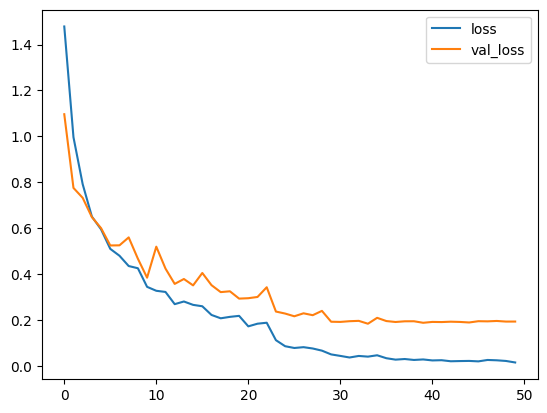

In [48]:
# Plotting training and validation loss
historyDf.loc[:, ['loss', 'val_loss']].plot()

<Axes: >

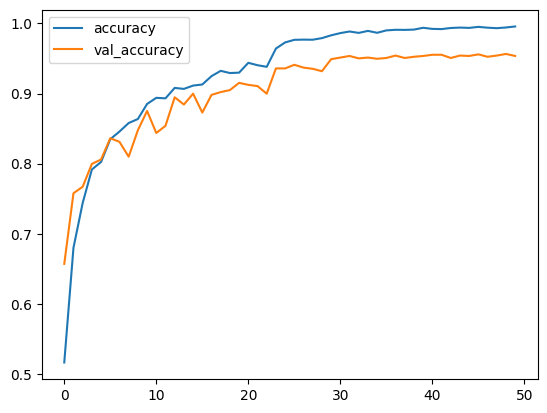

In [49]:
# Plotting training and validation accuracy
historyDf.loc[:, ['accuracy', 'val_accuracy']].plot()

In [50]:
# Evaluating model
score = model.evaluate(X_test, Y_test)[1] * 100
print(f'Validation accuracy of model : {score:.2f}%')

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9509 - loss: 0.2044
Validation accuracy of model : 95.65%


**Testing Some Test Audio Data
Steps**

1. Preprocess the new audio data
2. predict the classes
3. Invere transform your Predicted Label

In [53]:
# audio_file_path="/kaggle/input/urbansound8k/fold10/102857-5-0-11.wav"
# librosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path) 
# mfccs_features = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=40)
# mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

# print(mfccs_scaled_features)
# mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
# print(mfccs_scaled_features)
# print(mfccs_scaled_features.shape)
# Preprocess the new audio data
# Preprocess the new audio data
audio_file_path = "/kaggle/input/urbansound8k/fold10/102857-5-0-11.wav"
librosa_audio_data, librosa_sample_rate = librosa.load(audio_file_path) 
mfccs_features = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=50)  # Adjust n_mfcc to 50
mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)
mfccs_scaled_features = mfccs_scaled_features.reshape(1, -1)

# Predict the class probabilities
predicted_probabilities = model.predict(mfccs_scaled_features)

# Find the class with the highest probability
predicted_class = np.argmax(predicted_probabilities)

# Inverse transform the predicted label
predicted_label = labelencoder.inverse_transform([predicted_class])[0]
print("Predicted Class:", predicted_label)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 559ms/step
Predicted Class: engine_idling
